In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
import pandas as pd
from mmctools.coupling.terrain import USGS, combine_raster_data

# Process elevation data at test site
Use USGS 1/3-arc-sec (10-m) data

In [2]:
#bounds = west, south, east, north = (-103.56, 40.96, -103.48, 41.02)
dx = dy = 10.  # output grid resolution
tifdata = 'download/USGS_*.tif' # manually downloaded, along with .xml metadata
combined_tif = 'data/Peetz_USGS_combined.tif'

In [3]:
ref_latlon = (40.99429, -103.52535) # met mast

## get elevation map

In [4]:
%time combined_bounds = combine_raster_data(tifdata, dtype=USGS, output=combined_tif)
combined_bounds

# Files: ['USGS_13_n42w104.tif', 'USGS_13_n41w104.tif']
# Source CRS datum: North American Datum of 1983
# Bounds: [-104.000555555094, 40.9994444447063, -102.999444444705, 42.0005555550957]
# Source CRS datum: North American Datum of 1983
# Bounds: [-104.000555555094, 39.9994444449061, -102.999444444705, 41.0005555552955]
# Raster profile: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -999999.0, 'width': 10812, 'height': 10812, 'count': 1, 'crs': CRS.from_epsg(4269), 'transform': Affine(9.259259252584321e-05, 0.0, -104.00055555555515,
#        0.0, -9.259259252584321e-05, 42.00055555555515), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
# CPU times: user 21.2 s, sys: 4.33 s, total: 25.6 s
# Wall time: 26.6 s

Files: ['download/USGS_13_n42w104.tif', 'download/USGS_13_n41w104.tif']
Source CRS datum: North American Datum of 1983
Bounds: [-104.000555555094, 40.9994444447063, -102.999444444705, 42.0005555550957]
Source CRS datum: North American Datum of 1983
Bounds: [-104.000555555094, 39.9994444449061, -102.999444444705, 41.0005555552955]
Raster profile: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -999999.0, 'width': 10812, 'height': 10812, 'count': 1, 'crs': CRS.from_epsg(4269), 'transform': Affine(9.259259252584321e-05, 0.0, -104.00055555555515,
       0.0, -9.259259252584321e-05, 42.00055555555515), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
CPU times: user 20.4 s, sys: 2.82 s, total: 23.2 s
Wall time: 24 s


[-104.000555555094, 39.9994444449061, -102.999444444705, 42.0005555550957]

In [5]:
usgs = USGS(combined_bounds, fpath=combined_tif)

In [6]:
%time x,y,z = usgs.to_terrain(dx,dy)

# Projecting from EPSG:4269 to EPSG:32613
# CPU times: user 50.9 s, sys: 6.06 s, total: 57 s
# Wall time: 59.1 s

Projecting from EPSG:4269 to EPSG:32613
CPU times: user 55.5 s, sys: 15.2 s, total: 1min 10s
Wall time: 1min 23s


In [7]:
x0,y0 = usgs.to_xy(*ref_latlon)
x0,y0

# (624032.9623371222, 4539170.370555064)

(624032.9623371222, 4539170.370555064)

In [8]:
# translated and trimmed
plotdelta = 2500. # plot 5 km x 5 km
xt = x - x0
yt = y - y0
sel = np.where((xt >= -plotdelta) & (xt <= plotdelta) & (yt >= -plotdelta) & (yt <= plotdelta))
imin = np.where(xt >= -plotdelta)[0][0]
imax = np.where(xt > plotdelta)[0][0]
jmin = np.where(yt >= -plotdelta)[1][0]
jmax = np.where(yt > plotdelta)[1][0]
xt = xt[imin:imax,jmin:jmax]
yt = yt[imin:imax,jmin:jmax]
zt = z[imin:imax,jmin:jmax]

<ipython-input-9-6172482d1449>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cm = ax.pcolormesh(xt,yt,zt/.3048,cmap='gray')


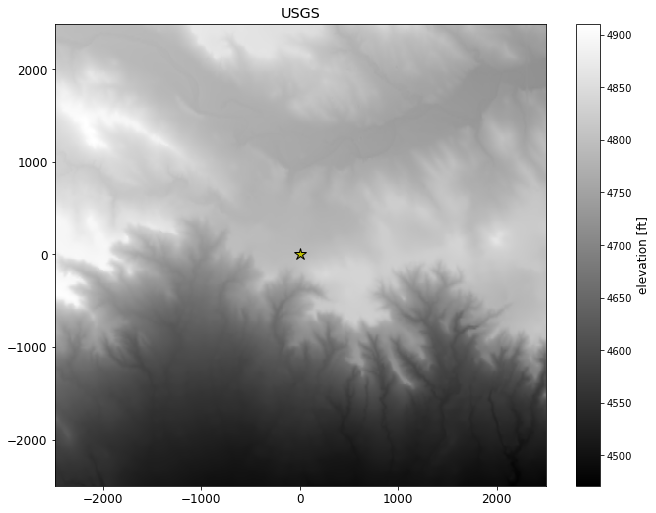

In [9]:
fig,ax = plt.subplots(figsize=(11,8.5))
#cm = ax.pcolormesh(xt,yt,zt,cmap='gray')
#cb = fig.colorbar(cm,ax=ax); cb.set_label('elevation [m]',fontsize='large')
cm = ax.pcolormesh(xt,yt,zt/.3048,cmap='gray')
cb = fig.colorbar(cm,ax=ax); cb.set_label('elevation [ft]',fontsize='large')

#cl = ax.contour(xt,yt,zt/.3048,[4600,4800],colors='k')

ax.tick_params(labelsize='large')
ax.set_title('USGS', fontsize='x-large')
# ax.set_xlim((-plotdelta,plotdelta))
# ax.set_ylim((-plotdelta,plotdelta))
ax.plot(0,0,'y*',ms=12,mec='k')

## get terrain transects

In [15]:
ymin,ymax = -8000,2000

In [16]:
y315,z315 = usgs.ytransect(latlon=ref_latlon, wdir=315., yrange=(ymin+y0,ymax+y0))

Slice through (624032.9623371222, 4539170.370555064) at -135.0 deg


In [17]:
y337,z337 = usgs.ytransect(latlon=ref_latlon, wdir=337.5, yrange=(ymin+y0,ymax+y0))

Slice through (624032.9623371222, 4539170.370555064) at -157.5 deg


In [18]:
y360,z360 = usgs.ytransect(latlon=ref_latlon, wdir=0, yrange=(ymin+y0,ymax+y0))

Slice through (624032.9623371222, 4539170.370555064) at 180 deg


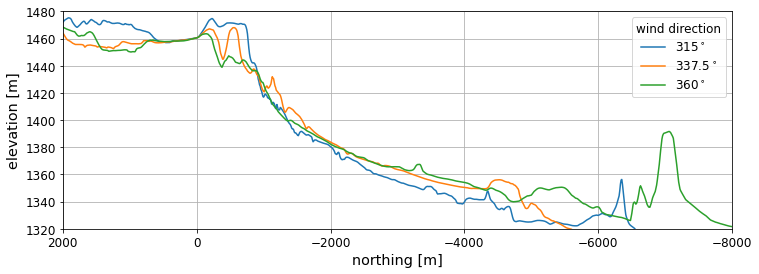

In [19]:
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(y315,z315,label=r'$315^\circ$')
ax.plot(y337,z337,label=r'$337.5^\circ$')
ax.plot(y360,z360,label=r'$360^\circ$')
ax.set_xlim((ymax,ymin))
ax.set_ylim((1320,1480))
ax.set_xlabel('northing [m]', fontsize='x-large')
ax.set_ylabel('elevation [m]', fontsize='x-large')
ax.tick_params(labelsize='large')
ax.grid()
lgd = ax.legend(loc='best',fontsize='large')
lgd.set_title('wind direction',prop=dict(size='large'))